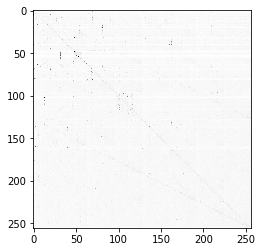

In [14]:
import os
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch

#paths
input_path = 'input/'
output_path = 'output/'

def toImage(filename, regulation, dim):
    with open(''.join([input_path, filename]), 'rb') as f:
        data = list(f.read())
        
    if len(data)%2:
        data = data[:-1]
    
    img = [[0 for x in range(256)] for y in range(256)]

    it = iter(data)

    for e in it:
        img[e][it.__next__()] += 1
            
    np.save(''.join([output_path, filename]), F.normalize(torch.FloatTensor(img), p=regulation, dim=dim).numpy())

def convertInputs():
    filenames = os.listdir(input_path)
    for filename in filenames:
        toImage(filename, 2.0, 1)

def showOutput(filename):
    image = np.load(output_path + filename + '.npy')
    plt.imshow(image, cmap='Greys', interpolation='nearest')
    plt.show()

convertInputs()
showOutput('test')